In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [65]:
data_url="https://lib.stat.cmu.edu/datasets/boston"

In [67]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4m/wf_9ww8d1ls4x6sncklsj_340000gn/T/ipykernel_37615/16828617.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [68]:
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", 
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

df = pd.DataFrame(data, columns=columns)
df['MEDV'] = target  

print(boston_df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [71]:
imputer = SimpleImputer(strategy='mean')  # You can also use median, most_frequent, etc.
data_imputed = imputer.fit_transform(df)

# 2. Feature Scaling (Standardization)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)
data_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [73]:



# Features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [75]:


# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


R² Score: 0.92


In [77]:


# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# R² Score
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R² Score with Random Forest: {r2_rf:.2f}")


R² Score with Random Forest: 0.88


In [ ]:


param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
print(f"Best R² Score after tuning: {r2_best:.2f}")


In [ ]:
import matplotlib.pyplot as plt

# Get feature importance from the trained model
xgb_importance = xgb_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(columns, xgb_importance)
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()


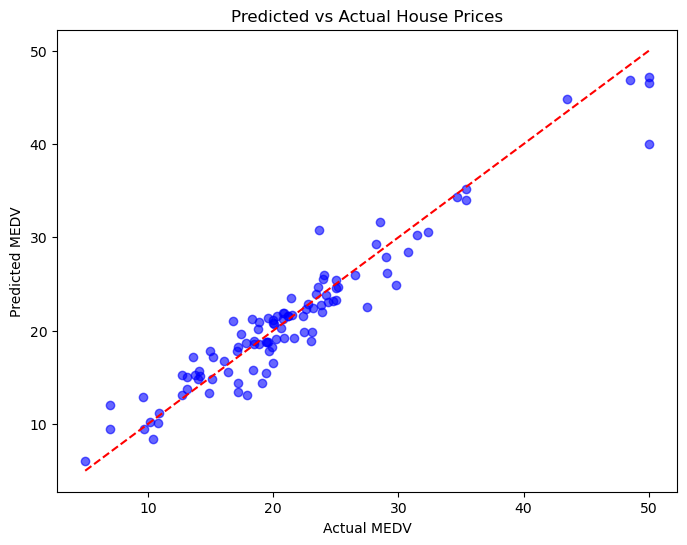

In [45]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Predicted vs Actual House Prices')
plt.show()


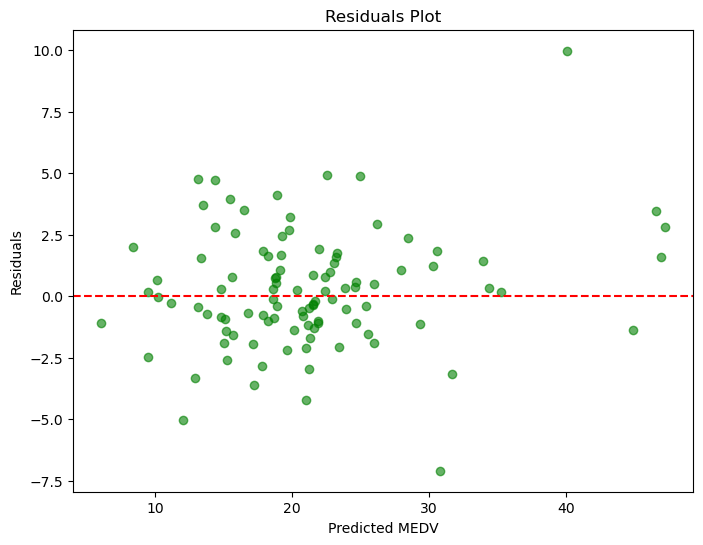

In [47]:
# Residuals plot (Actual - Predicted)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Zero line
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


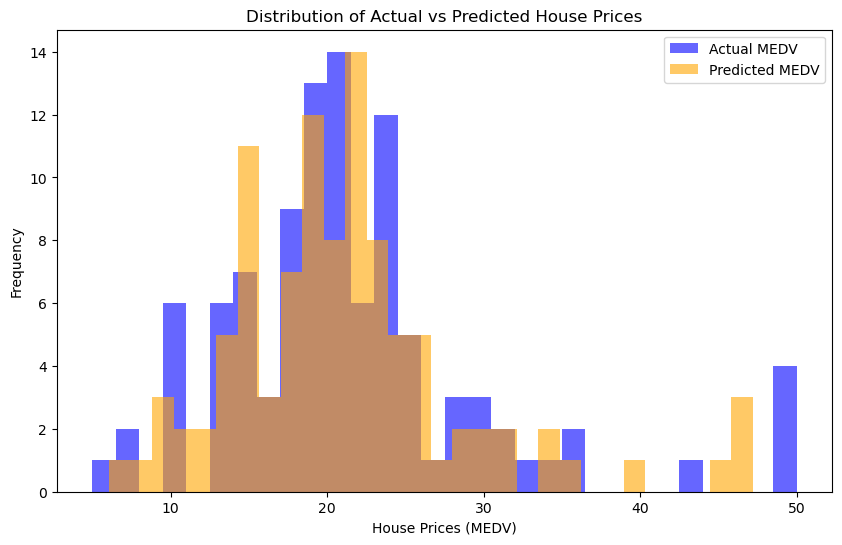

In [49]:
# Histogram for Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.6, label='Actual MEDV', color='blue')
plt.hist(y_pred, bins=30, alpha=0.6, label='Predicted MEDV', color='orange')
plt.legend()
plt.xlabel('House Prices (MEDV)')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted House Prices')
plt.show()
